**Q1. What is information gain and how is it used in decision tree?**

Answer:

Information gain measures how much uncertainity is reduced after splitting a dataset on a particular feature. It tells us which feature best seperates the data into distincr classes Decision trees aimm to create pure nodes. Before splitting the data has higher uncertainity. After splitting it has less uncertainity. This uncertainity is measured using entropy

Formula =

Entropy(S)=−∑p log2(pi)

pi = proportion of class i in dataset S entropy = 0 ---- completely pure entropy = 1 ------ maximum impurity

Information Gain is a measure of the reduction in entropy after splitting a dataset on a feature and is used in decision trees to select the best attribute for splitting at each node.

**Q2. What is the difference between Gini Impurity and Entropy?**

Answer:

Both Gini Impurity and entropy are a measure used in Decision Trees to determine how 'pure' a node is and to decide the best split. However they differ in calculations and behaviours. Gini impurity measures the probability of misclasssifying a random chosen data point, while entropy measures the amount of uncertainityor disorder in the data.


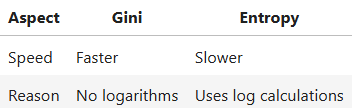


Gini Impurity measures misclassification probability, while Entropy measures uncertainty; both are used to evaluate split quality in decision trees, with Gini being faster and Entropy more information-theoretic.

**Q3. What is pre- pruning in decision tree?**

Answer:

Pre-prunning is also called early stopping, is a technique used in decision trees to stop the tree from growing further during training in order to prevent overfitting.

-> Importance - large trees can memorize training data and leads to overfitting ,poor performance on unseen data. Pre - pruning helps improve the generalization.


-> Tree stops growing if any of the foll conditions are met

Maximum depth is reached,

Minimum samples required to split a node,

Minimum samples required at a leaf node

Minimum information gain.

-> Advantages of Pre-Pruning

Reduces overfitting

Faster training

Simpler and more interpretable trees

Uses less memory

**Q4. Write a python program to train a Decision Tree Classifier using Gini Impurity as the creterion and print the feature importances**(practical)
Hint: Use criterion='gini' in DecisionTreeClassifier and access .feature_importances_.
(Include your Python code and output in the code box below.)


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Data
data = {
    'study_hours': [2, 4, 6, 8, 10, 1, 3, 5],
    'attendance': [60, 70, 80, 90, 95, 50, 65, 75],
    'passed': [0, 0, 1, 1, 1, 0, 0, 1]
}

print(data)

df = pd.DataFrame(data)
print(df)

X = df[['study_hours', 'attendance']]
y = df['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

model = DecisionTreeClassifier(criterion = "gini", random_state = 42)
model

{'study_hours': [2, 4, 6, 8, 10, 1, 3, 5], 'attendance': [60, 70, 80, 90, 95, 50, 65, 75], 'passed': [0, 0, 1, 1, 1, 0, 0, 1]}
   study_hours  attendance  passed
0            2          60       0
1            4          70       0
2            6          80       1
3            8          90       1
4           10          95       1
5            1          50       0
6            3          65       0
7            5          75       1


DecisionTreeClassifier(random_state=42)

In [2]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3]:
for f in model.feature_importances_:
    print(f)

1.0
0.0


**Question 5: What is a Support Vector Machine (SVM)?**

Answer:

- A Support Vector Machine (SVM) is a supervised learning algorithm primarily used for classification tasks, though it can also handle regression problems.
- It belongs to the family of max-margin classifiers, meaning it seeks the decision boundary that maximizes the separation between classes.

Key Features:

- Margin Maximization: Ensures better generalization to unseen data.
- Support Vectors: Only a subset of training points (the most critical ones) influence the model.
- Kernel Trick: Allows SVMs to handle non-linear classification by mapping data into higher dimensions (e.g., polynomial, radial basis function kernels).
- Versatility: Works well for both linear and non-linear problems, especially effective in high-dimensional spaces.

Advantages
- High accuracy for small to medium datasets.
- Effective in cases where there is a clear margin of separation.
- Robust against overfitting, especially in high-dimensional spaces.

**Question 6: What is the Kernel Trick in SVM?**

Answer:

- The Kernel Trick is a method used in Support Vector Machines (SVMs) to make them capable of solving non-linear problems.
- Instead of directly transforming data into higher dimensions (which is computationally expensive), the kernel trick computes the inner product in the transformed space using a kernel function.

- Linear Case:
- For linearly separable data, SVM finds a hyperplane that separates classes.
- Non-linear Case:
- Many real-world datasets are not linearly separable.
- The kernel trick maps data into a higher-dimensional feature space where a linear separation is possible.
- Key Idea:
- The transformation is never explicitly computed.
- Instead, a kernel function calculates the dot product in the higher-dimensional space directly.

- Enables SVM to handle complex, non-linear decision boundaries.
- Avoids the computational cost of explicitly mapping data into high dimensions.
- Provides flexibility by choosing different kernel functions depending on the dataset.

Advantages:

- Enables SVM to handle complex, non-linear decision boundaries.
- Avoids the computational cost of explicitly mapping data into high dimensions.
- Provides flexibility by choosing different kernel functions depending on the dataset.

Question 7: Write a Python program to train two SVM classifiers with Linear and RBF
kernels on the Wine dataset, then compare their accuracies.

Hint:Use SVC(kernel='linear') and SVC(kernel='rbf'), then compare accuracy scores after fitting
on the same dataset.
(Include your Python code and output in the code box below.)

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

wine = load_wine()
X = wine.data
y = wine.target

X_train , X_test, y_train , y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM with Linear Kernel

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)

# SVM with RBF Kernel

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)

print('Linear Kernal Accuracy', linear_accuracy)
print('RBF Kernel Accuracy', rbf_accuracy)

Linear Kernal Accuracy 0.9722222222222222
RBF Kernel Accuracy 1.0


**Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?**

Answer:

Definition
- The Naïve Bayes classifier applies Bayes’ Theorem to predict the probability that a given instance belongs to a particular class.
- It calculates the posterior probability of a class given the input features.

Bayes’ Theorem:

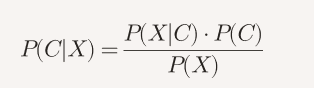

Where:
- P(C|X) = Posterior probability of class C given features X
- P(X|C) = Likelihood of features given class C
- P(C) = Prior probability of class C
- P(X) = Evidence (probability of features)

Types of Naïve Bayes Models
- Multinomial Naïve Bayes: Used for text classification (word counts).
- Bernoulli Naïve Bayes: Used for binary/boolean features.
- Gaussian Naïve Bayes: Used when features follow a normal distribution.

Advantages
- Fast and efficient, even with large datasets.
- Performs well with high-dimensional data (e.g., text).
- Requires relatively small amounts of training data.




Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes

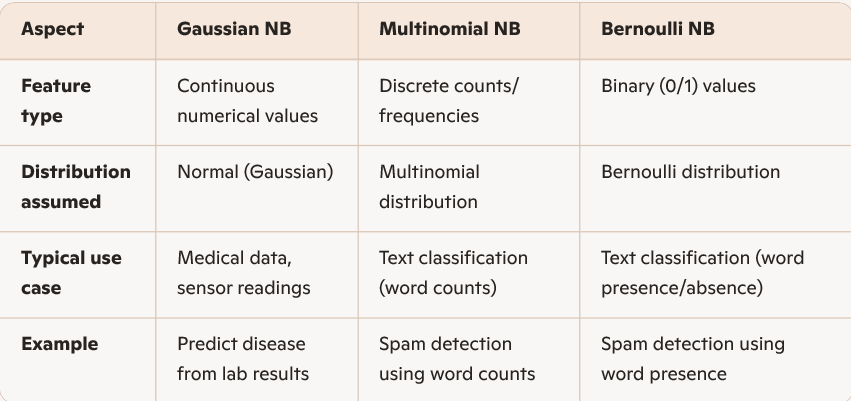


Question 10: Breast Cancer Dataset
Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer
dataset and evaluate accuracy.
Hint:Use GaussianNB() from sklearn.naive_bayes and the Breast Cancer dataset from
sklearn.datasets.
(Include your Python code and output in the code box below.)


In [5]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naïve Bayes:", accuracy)

Accuracy of Gaussian Naïve Bayes: 0.9736842105263158
